# Buisness case

Companies want to understand their customers more deeply by clustering customers based on similar interests and needs. So that the marketing team can market the target customers according to their preferences and increase their sales eventually.

### Problem statement

* Segment the customers based on RFM so that the companies can target customers effectively

* R (Recency) - No. of days since last purchase.
* F (Frequency) - No. of transactions.
* M (Monetary) - Total revenue contributed.

### Import basic libraries

In [202]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Load the data

In [203]:
data = pd.read_csv('Retail.csv')

### Basic checks

In [204]:
#First five rows
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [205]:
#Last five rows
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-2011 12:50,4.95,12680.0,France


In [206]:
# No.of rows and columns
data.shape

(541909, 8)

In [207]:
#basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


* There are null values in Description and customerID and we have to deal with it.

In [208]:
#Basic analysis
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [209]:
data.describe(include='O')

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,31-10-2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


### Data cleaning

In [210]:
# Finding missing values in %
df_null = round((data.isnull().sum()/len(data))*100,2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [211]:
# Dropping rows that have missing values
data = data.dropna()

In [212]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [213]:
data.shape

(406829, 8)

In [214]:
# Changing the datatype of customerID
data['CustomerID'] = data['CustomerID'].astype(str)

In [215]:
# New attribute Monetary
data['Amount'] = data['Quantity']*data['UnitPrice']
data_gm = data.groupby('CustomerID')['Amount'].sum()
data_gm = data_gm.reset_index()
data_gm

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [216]:
# New attribute Frequency
data_f = data.groupby('CustomerID')['InvoiceNo'].count()
data_f = data_f.reset_index()
data_f.columns = ['CustomerID','Frequency']
data_f

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


In [217]:
# Merging two dataframes
datafm = pd.merge(data_gm,data_f,on='CustomerID', how = 'inner')
datafm

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17
...,...,...,...
4367,18280.0,180.60,10
4368,18281.0,80.82,7
4369,18282.0,176.60,13
4370,18283.0,2094.88,756


In [218]:
# New attribute Recency
# Convert to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'],format = '%d-%m-%Y %H:%M')

In [219]:
# To know the last transaction date
max_date = max(data['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [220]:
# Compute the difference between max date and transaction date
data['Diff'] = max_date - data['InvoiceDate']
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0 days 00:00:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0 days 00:00:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0 days 00:00:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0 days 00:00:00


In [221]:
# Compute recency of customers
data_dif = data.groupby('CustomerID')['Diff'].min()
data_dif = data_dif.reset_index()

In [222]:
data_dif

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00
...,...,...
4367,18280.0,277 days 02:58:00
4368,18281.0,180 days 01:57:00
4369,18282.0,7 days 01:07:00
4370,18283.0,3 days 00:48:00


In [223]:
import datetime as dt

In [224]:
data_dif['Diff'] = data_dif['Diff'].dt.days
data_dif.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [225]:
# Merge the final RFM dataframe
datafm = pd.merge(datafm,data_dif, on ='CustomerID',how='inner')

In [226]:
datafm.head()

,CustomerID,Amount,Frequency,Diff
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [227]:
datafm.rename({'Diff':'Recency'},axis=1,inplace=True)

In [228]:
datafm.columns

Index(['CustomerID', 'Amount', 'Frequency', 'Recency'], dtype='object')

In [229]:
datafm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


### EDA- Exploratory data analysis

<AxesSubplot:xlabel='Recency', ylabel='Frequency'>

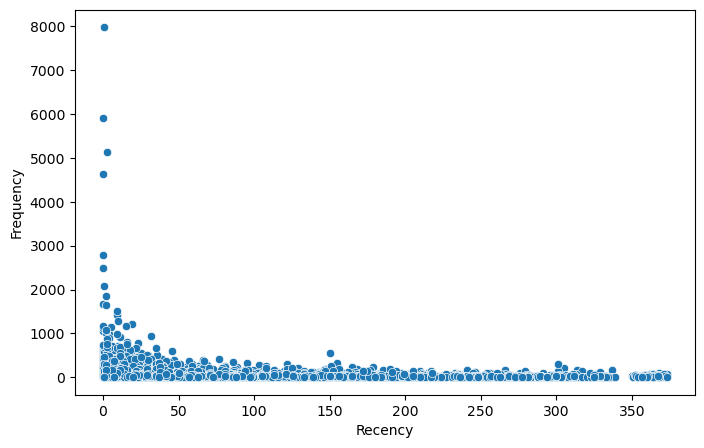

In [230]:
sns.scatterplot(data=datafm, x='Recency',y='Frequency')

### Insights
* Lower the recency higher the frequency

### Finding the outliers

Text(0, 0.5, 'Range')

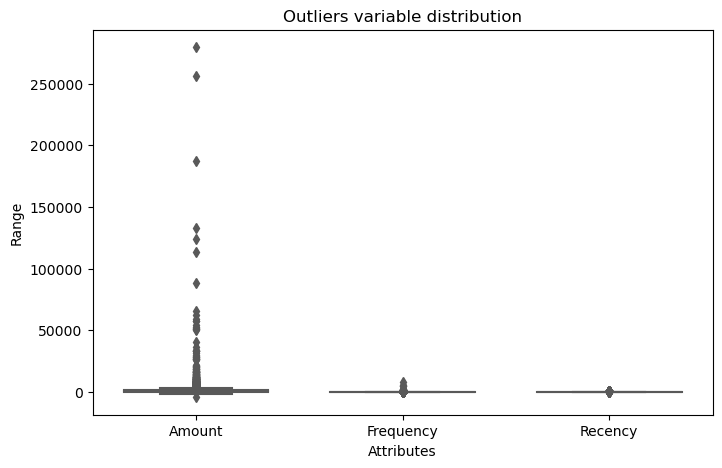

In [231]:
# Outlier analysis of Amount,Frequency and Recency
attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [8,5]
sns.boxplot(data = datafm[attributes],orient='v',palette = 'Set2',whis=1.5,saturation=1,width=0.7)
plt.title('Outliers variable distribution')
plt.xlabel('Attributes')
plt.ylabel('Range')

In [232]:
# Removing outliers for Amount
Q1=datafm.Amount.quantile(0.05)
Q3=datafm.Amount.quantile(0.95)
IQR = Q3-Q1
datafm = datafm[(datafm.Amount>=Q1-1.5*IQR) & (datafm.Amount<=Q3+1.5*IQR)]

# Removing outliers for Frequency
Q1=datafm.Frequency.quantile(0.05)
Q3=datafm.Frequency.quantile(0.95)
IQR = Q3-Q1
datafm = datafm[(datafm.Frequency>=Q1-1.5*IQR) & (datafm.Frequency<=Q3+1.5*IQR)]

# Removing outliers for Recency
Q1=datafm.Recency.quantile(0.05)
Q3=datafm.Recency.quantile(0.95)
IQR = Q3-Q1
datafm = datafm[(datafm.Recency>=Q1-1.5*IQR) & (datafm.Recency<=Q3+1.5*IQR)]

### Scaling the data

In [233]:
from sklearn.preprocessing import StandardScaler
# Initialize StandardScaler
scaler = StandardScaler()
datafm_df = datafm[['Amount','Frequency','Recency']]
datafm_scaled = scaler.fit_transform(datafm_df)

In [234]:
datafm_scaled = pd.DataFrame(datafm_scaled)

In [235]:
datafm_scaled.rename({0:'Amount',1:'Frequency',2:'Recency'},axis=1,inplace=True)

In [236]:
datafm_scaled

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188
...,...,...,...
4288,-0.624669,-0.683068,-0.193560
4289,-0.620853,-0.673094,1.826341
4290,-0.677696,-0.703017,0.865898
4291,-0.623131,-0.643171,-0.847057


### Model Building

In [237]:
from sklearn.cluster import KMeans

In [238]:
Kmeans = KMeans(n_clusters=4,max_iter=50)
Kmeans.fit(datafm_scaled)

KMeans(max_iter=50, n_clusters=4)

In [239]:
Kmeans.labels_

array([2, 1, 0, ..., 2, 0, 0])

In [240]:
set(Kmeans.labels_)

{0, 1, 2, 3}

### Elbow Method

Text(0, 0.5, 'WCSS')

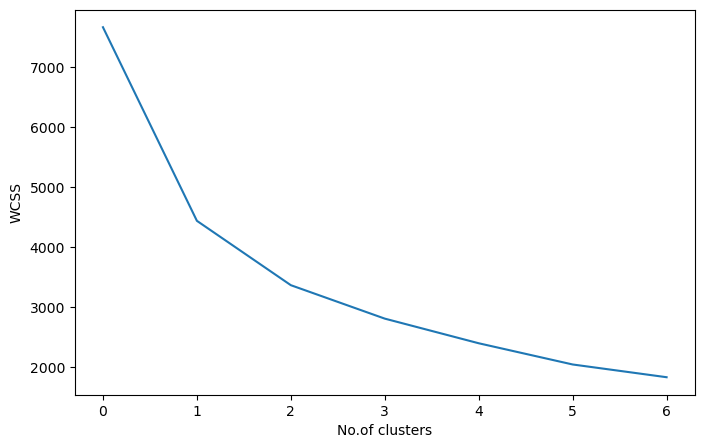

In [241]:
ssd=[]
range1 = [2,3,4,5,6,7,8]
for num_clusters in range1:
    Kmeans = KMeans(n_clusters = num_clusters,max_iter = 50)
    Kmeans.fit(datafm_scaled)
    ssd.append(Kmeans.inertia_)
plt.plot(ssd)
plt.xlabel('No.of clusters')
plt.ylabel('WCSS')

In [242]:
Kmeans = KMeans(n_clusters=3,max_iter=300)
Kmeans.fit(datafm_scaled)

KMeans(n_clusters=3)

In [243]:
pred = Kmeans.fit_predict(datafm_scaled)

In [244]:
pred

array([0, 1, 2, ..., 0, 2, 2])

In [245]:
# Adding predicted Label column to dataframe
datafm_scaled['Label'] = pred

In [246]:
datafm_scaled

,Amount,Frequency,Recency,Label
0,-0.723738,-0.752888,2.301611,0
1,1.731617,1.042467,-0.906466,1
2,0.300128,-0.463636,-0.183658,2
3,0.277517,-0.044720,-0.738141,2
4,-0.533235,-0.603275,2.143188,0
...,...,...,...,...
4288,-0.624669,-0.683068,-0.193560,2
4289,-0.620853,-0.673094,1.826341,0
4290,-0.677696,-0.703017,0.865898,0
4291,-0.623131,-0.643171,-0.847057,2


In [247]:
datafm_scaled['Label'].value_counts()

2    2726
0    1068
1     499
Name: Label, dtype: int64

In [248]:
datafm_scaled[datafm_scaled['Label']==0]

,Amount,Frequency,Recency,Label
0,-0.723738,-0.752888,2.301611,0
4,-0.533235,-0.603275,2.143188,0
6,-0.673036,-0.732939,1.093632,0
7,-0.108817,-0.194333,1.370873,0
8,-0.462024,-0.643171,1.192647,0
...,...,...,...,...
4272,-0.752280,-0.732939,2.588754,0
4277,-0.638581,-0.643171,0.459938,0
4281,-0.644609,-0.693042,2.618459,0
4289,-0.620853,-0.673094,1.826341,0


In [249]:
datafm_scaled['CustomerID'] = datafm['CustomerID']

In [250]:
datafm_scaled

,Amount,Frequency,Recency,Label,CustomerID
0,-0.723738,-0.752888,2.301611,0,12346.0
1,1.731617,1.042467,-0.906466,1,12347.0
2,0.300128,-0.463636,-0.183658,2,12348.0
3,0.277517,-0.044720,-0.738141,2,12349.0
4,-0.533235,-0.603275,2.143188,0,12350.0
...,...,...,...,...,...
4288,-0.624669,-0.683068,-0.193560,2,18176.0
4289,-0.620853,-0.673094,1.826341,0,18177.0
4290,-0.677696,-0.703017,0.865898,0,18178.0
4291,-0.623131,-0.643171,-0.847057,2,18179.0


# Visualizing clustered labels

### Exploring Label  with Amount

<AxesSubplot:xlabel='Label', ylabel='Amount'>

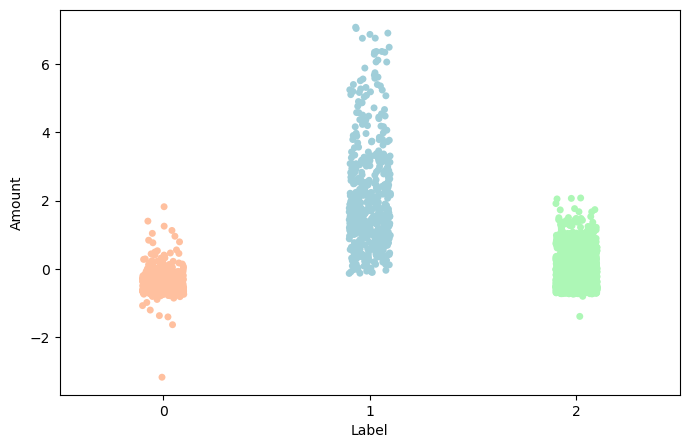

In [251]:
custom_palette = {'0': '#ffc09f', '1': '#a0ced9', '2': '#adf7b6'}
sns.stripplot(data=datafm_scaled,x='Label',y='Amount',palette=custom_palette)

### Exploring Label with Frequency

<AxesSubplot:xlabel='Label', ylabel='Frequency'>

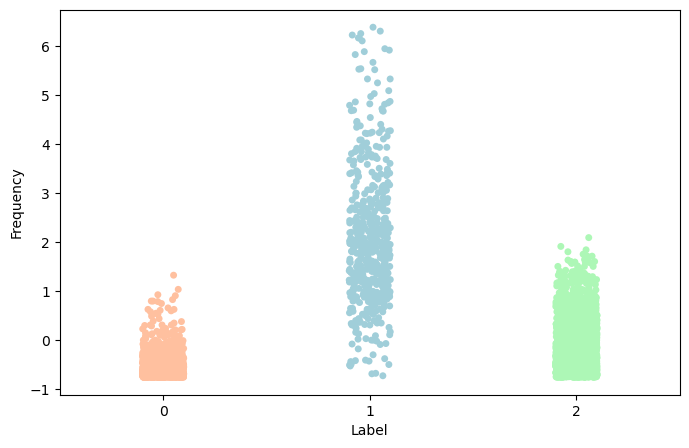

In [252]:
sns.stripplot(data=datafm_scaled,x='Label',y='Frequency',palette=custom_palette)

### Exploring Label with Recency

<AxesSubplot:xlabel='Label', ylabel='Recency'>

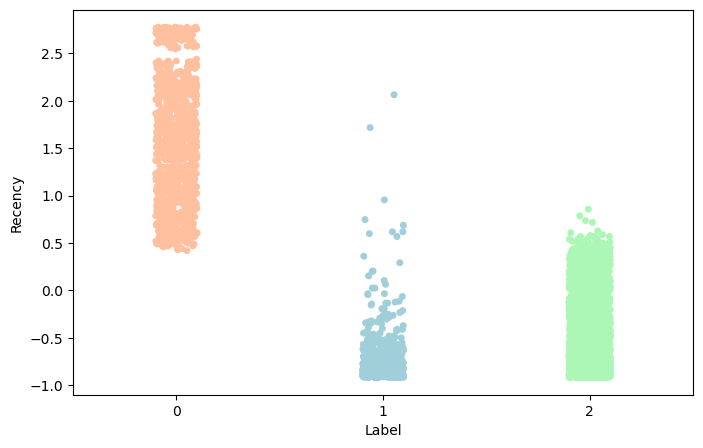

In [253]:
sns.stripplot(data=datafm_scaled,x='Label',y='Recency',palette=custom_palette)

### Conclusion
* Final Insights that are obtained after clustering the customers into three different groups are as follows

### Label 1 Customers

* Label 1 Customers spend high amount
* Label 1 Customers frequently transact more compared to label 1 and label 0
* Label 1 Customers recency is low

### Label 2 Customers

* Label 2 Customers spend medium amount
* Label 2 Customers frequency is also average
* Label 2 Customers recency is also medium

### Label 0 Customers

* Label 0 Customers spend less amount
* Label 0 Customers have less frequent transactions
* Label 0 Customers are high in recency